# Portfolio Project: Life Expectancy and GDP
Code and analysis by Adam Laviguer \<adamlaviguer@gmail.com\>

___
## Project Goals
1. Demonstrate ability to scope, execute, and document a data exploration and analysis project.
2. Demonstrate knowledge of Python for data visualization and analysis.
    - Seaborn and Matplotlib
    - Preprocess, explore, and analyze data
3. Exercise analytical thought process.

## Prompt
For this project, you will analyze data on GDP and life expectancy from the World Health Organization and the World Bank to try and identify the relationship between the GDP and life expectancy of six countries.

During this project, you will analyze, prepare, and plot data in order to answer questions in a meaningful way.

After you perform your analysis, you’ll be creating a blog post to share your findings on the World Health Organization website.

___
## Project Data

In [40]:
# Import common libraries. All or some of these may be used.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
from scipy.stats import iqr, ttest_ind, pearsonr, trim_mean, chi2_contingency, ttest_1samp, binomtest

# Read the data file into a pandas DataFrame.
df = pd.read_csv('./codecademy-portfolio-project-life-expectancy-gdp/all_data.csv')
# Display the first 5 rows of the DataFrame.
print('\n=================== FIRST FIVE ROWS ===================\n{}\n'.format(df.head()))
print('\n=================== DF INFO ===================')
df.info()
print('\n\n=================== DF DESCRIBE ===================\n{}\n'.format(df.describe()))


=================== FIRST FIVE ROWS ===================
  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


=================== DF INFO ===================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1),

___
## Data Analysis

### Explore and Validate Data

Given the summary statistics shown above, we know there are `96` total records in this dataset. The dataset is made up of 4 variables named `Country`, `Year`, `Life expectancy at birth (years)`, and `GDP`. We can also state that there are no null or missing values in any variable, as shown by the `.info()` function called on our DataFrame. Similarly, the `datatype` of each variable appears to be aligned with the data it holds.

A precursory examination of the `Country` variable reveals that there are `6` unique countries represented in the dataset with `16` records for each country. The countries included are: `Chile`, `China`, `Germany`, `Mexico`, `United States of America`, and `Zimbabwe`.

In [41]:
print('Number of unique countries represented: {}\n'.format(df['Country'].nunique()))
print(df['Country'].value_counts())

Number of unique countries represented: 6

Country
Chile                       16
China                       16
Germany                     16
Mexico                      16
United States of America    16
Zimbabwe                    16
Name: count, dtype: int64


In examining the `Year` variable, we see no inconsistencies. The range of `Year` appears to be `2000` to `2015` as indicated by the min and max shown by the `.info()` function called on our DataFrame. The variable contains `6` counts of each unique `Year` which is aligned with the `6` unique `Country` values.

In [42]:
print(df['Year'].value_counts())

Year
2000    6
2001    6
2002    6
2003    6
2004    6
2005    6
2006    6
2007    6
2008    6
2009    6
2010    6
2011    6
2012    6
2013    6
2014    6
2015    6
Name: count, dtype: int64


In examining the `Life expectancy at birth (years)` variable, we see no obvious outliers given the min and max values revealed by the `.info()` function we called on our DataFrame.

Lastly, although the data does appear to be ordered (as shown by the first 5 rows), let's sort the whole DataFrame to be certain.

In [43]:
df = df.sort_values(by=['Country', 'Year']).reset_index(drop=True)

### Analysis

#### Life Expectancy Over Time

To begin the analysis, let's look at the trend of life expectancy over time by country.

We can see by the plots below that between the years `2000` and `2015`, there is definitely an upward trend of life expectancy in all countries represented. This is particularly evident given the normalized trends of life expectancy over time for each country.

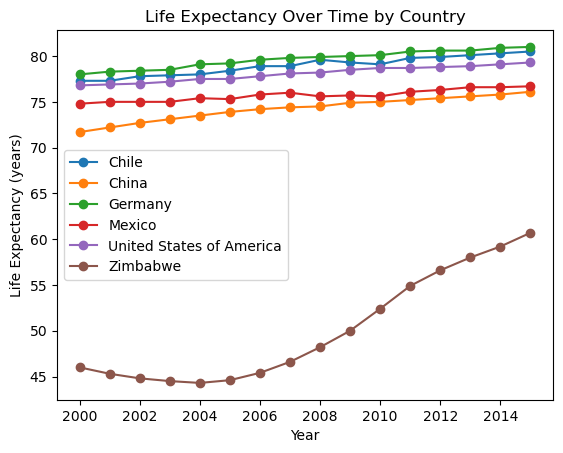

<Figure size 640x480 with 0 Axes>

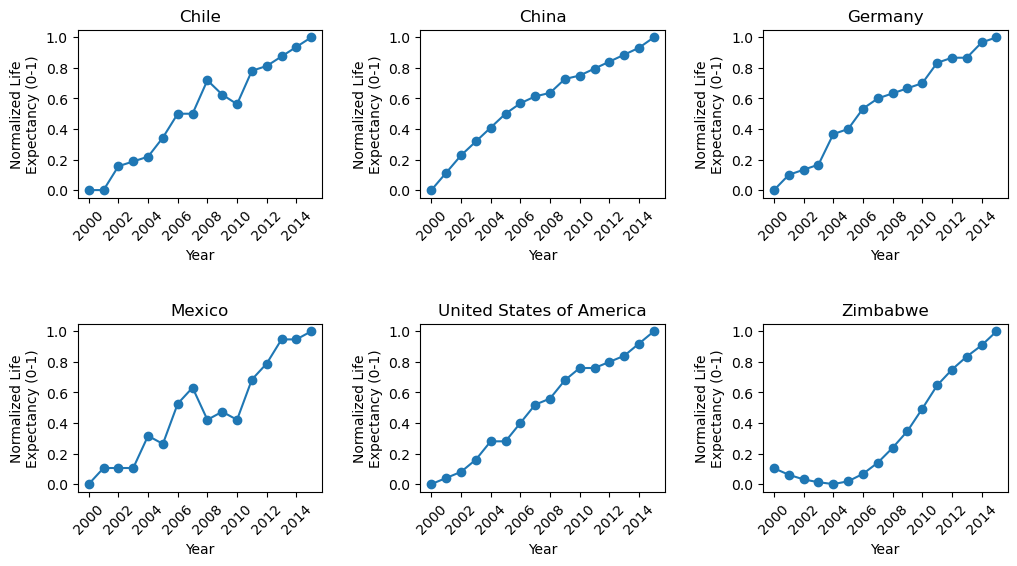

<Figure size 640x480 with 0 Axes>

In [51]:
# Plot the life expectancy over time for each country.
for country in df['Country'].unique():
    country_df = df[df['Country'] == country]
    plt.plot(country_df['Year'], country_df['Life expectancy at birth (years)'], marker='o', label=country)
plt.title('Life Expectancy Over Time by Country')
plt.xlabel('Year')
plt.ylabel('Life Expectancy (years)')
plt.legend(loc='center left')
plt.show()
plt.clf()


# Normalize Life Expectancy for each country to a 0-1 scale for better comparison using min-max normalization: (x - min) / (max - min)
g = df.groupby('Country')['Life expectancy at birth (years)']    # this is a SeriesGroupBy object
rng = g.transform('max') - g.transform('min')   # this is saving the range (max - min) for each country group in the SeriesGroupBy object 'g'
df['Life_exp_norm_0_1'] = (df['Life expectancy at birth (years)'] - g.transform('min')) / rng.replace(0, np.nan)  # this is adding a new column to the DataFrame which is the normalized Life Expectancy value
                                                                                # .replace() avoids division by zero by replacing 0 with NaN
x_ticks = range(df['Year'].min(), df['Year'].max()+1, 2)    # create a set of x-ticks for every 2 years

plt.figure(figsize=(12,6))
for country in df['Country'].unique():
    country_df = df[df['Country'] == country]
    plt.subplot(2,3, list(df['Country'].unique()).index(country)+1)
    plt.plot(country_df['Year'], country_df['Life_exp_norm_0_1'], marker='o', label=country)
    plt.title(country)
    plt.xlabel('Year')
    plt.xticks(x_ticks, rotation=45)
    plt.ylabel('Normalized Life\nExpectancy (0-1)')
plt.subplots_adjust(hspace=.75, wspace=.4)
plt.show()
plt.clf()

#### GDP Over Time

GDP trends over time do indicate that all 6 countries experienced a general increase in GDP between the year `2000` and `2015`, though the gross *amount* of increase is largely variated between several countries.

For example, in the first chart we clearly see the USA has the largest `GDP` value for each `Year` and is certainly trending upwards over time. In the same chart, however, it is appears that there is little to no increase for the country Zimbabwe.

To see the true trend of `GDP` for each `Country`, we must normalize the y-scale (`GDP`) for each country. Once we have done this, we do in fact see that all 6 countries have GDP values which are, on average, trending upwards.

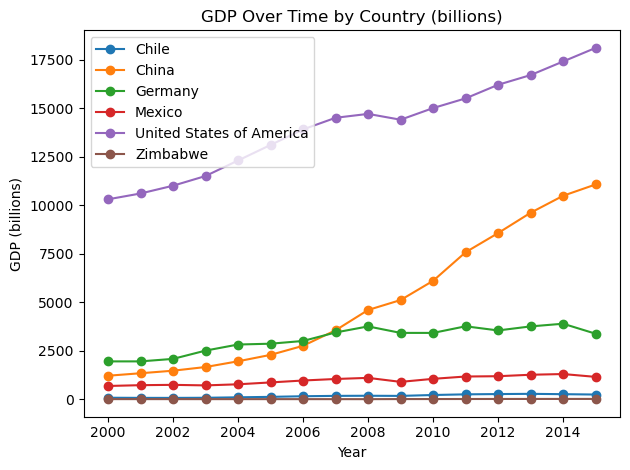

<Figure size 640x480 with 0 Axes>

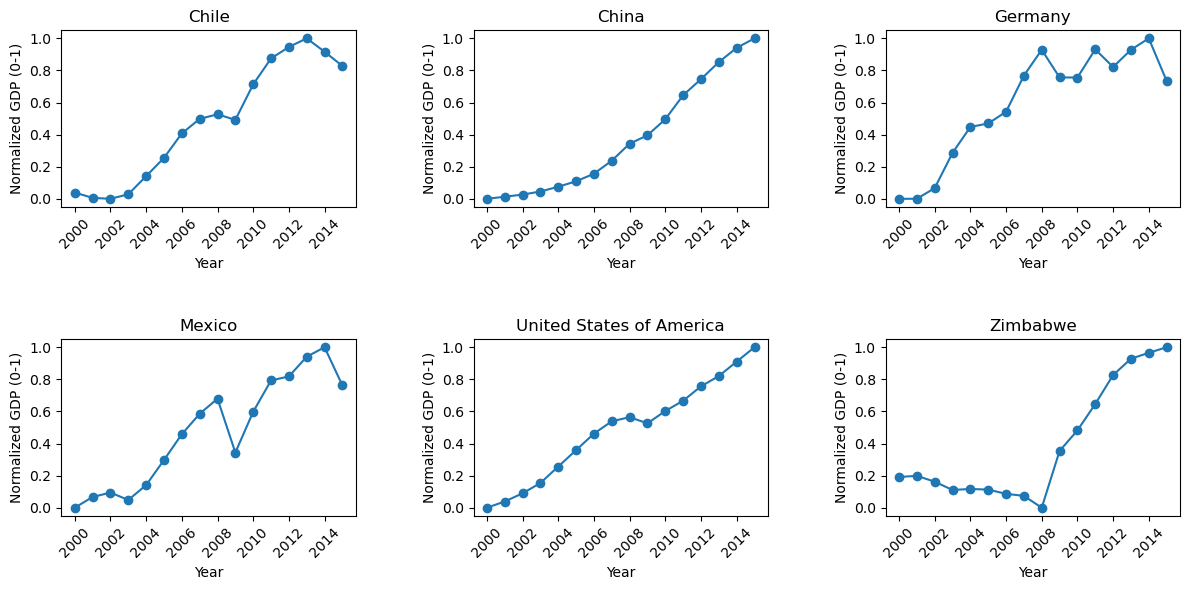

<Figure size 640x480 with 0 Axes>

In [60]:
# Add a column for GDP in billions for easier readability.
df['GDP_billions'] = df['GDP'] / 1e9

# Plot the GDP over time for each country using a billions scaled y axis.
for country in df['Country'].unique():
    country_df = df[df['Country'] == country]
    plt.plot(country_df['Year'], country_df['GDP_billions'], marker='o', label=country)
plt.title('GDP Over Time by Country (billions)')
plt.xlabel('Year')
plt.ylabel('GDP (billions)')
plt.tight_layout()
plt.legend(loc='upper left')
plt.show()
plt.clf()

# # Plot the GDP over time for each country using a log scaled y axis.
# for country in df['Country'].unique():
#     country_df = df[df['Country'] == country]
#     plt.plot(country_df['Year'], country_df['GDP'], marker='o', label=country)
# plt.title('GDP Over Time by Country (log scale)')
# plt.xlabel('Year')
# plt.ylabel('GDP (log scale)')
# plt.yscale('log')
# plt.tight_layout()
# plt.legend()
# plt.show()
# plt.clf()

# Normalize GDP for each country to a 0-1 scale for better comparison using min-max normalization: (x - min) / (max - min)
g = df.groupby('Country')['GDP']    # this is a SeriesGroupBy object
rng = g.transform('max') - g.transform('min')   # this is saving the range (max - min) for each country group in the SeriesGroupBy object 'g'
df['GDP_norm_0_1'] = (df['GDP'] - g.transform('min')) / rng.replace(0, np.nan)  # this is adding a new column to the DataFrame which is the normalized GDP value
                                                                                # .replace() avoids division by zero by replacing 0 with NaN
x_ticks = range(df['Year'].min(), df['Year'].max()+1, 2)    # create a set of x-ticks for every 2 years

plt.figure(figsize=(12,6))
for country in df['Country'].unique():
    country_df = df[df['Country'] == country]
    plt.subplot(2,3, list(df['Country'].unique()).index(country)+1)
    plt.plot(country_df['Year'], country_df['GDP_norm_0_1'], marker='o', label=country)
    plt.title(country)
    plt.xlabel('Year')
    plt.xticks(x_ticks, rotation=45)
    plt.ylabel('Normalized GDP (0-1)')
    plt.tight_layout()
plt.subplots_adjust(hspace=.75, wspace=.4)
plt.show()
plt.clf()


#### Hypothesis - Correlation between Life Expectancy and GDP

Given the general increase over time trend for both `Life expectancy at birth (years)` and `GDP` shown by these separate analyses, we may hypothesize that there is a correation between these two variables.

To begin to prove this hypothesis, let's compare the `Life expectancy at birth (years)` and `GDP` variables directly. Since we have already normalized these variables to a 0-1 scale, we will use the normalized variables for this comparison.

As shown in the plots below, we can be quite confident that there is a linear relationship between these two variables where `Life expectancy at birth (years)` increases as `GDP` increases.

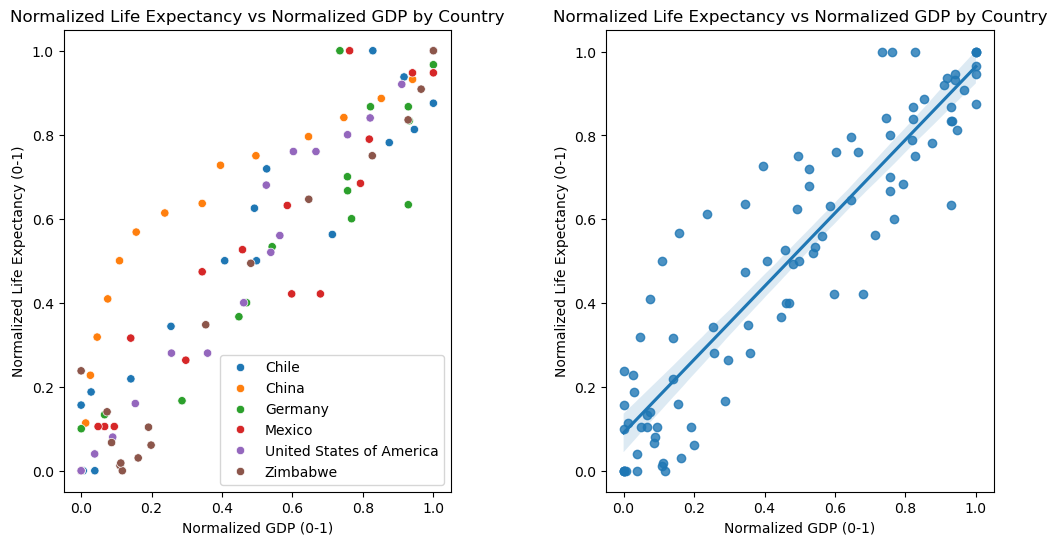

<Figure size 640x480 with 0 Axes>

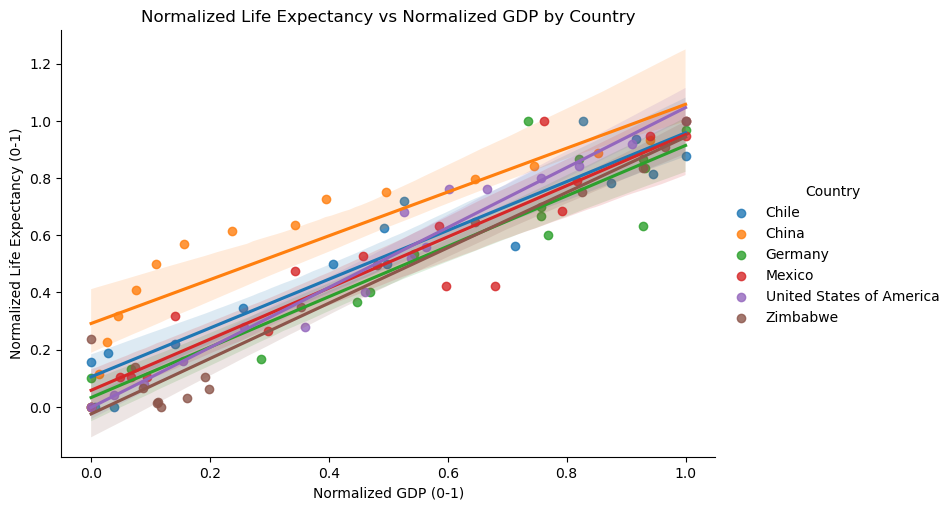

<Figure size 640x480 with 0 Axes>

In [69]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(data=df, x='GDP_norm_0_1', y='Life_exp_norm_0_1', hue='Country')
plt.title('Normalized Life Expectancy vs Normalized GDP by Country')
plt.xlabel('Normalized GDP (0-1)')
plt.ylabel('Normalized Life Expectancy (0-1)')
plt.legend()

plt.subplot(1,2,2)
sns.regplot(data=df, x='GDP_norm_0_1', y='Life_exp_norm_0_1')
plt.title('Normalized Life Expectancy vs Normalized GDP by Country')
plt.xlabel('Normalized GDP (0-1)')
plt.ylabel('Normalized Life Expectancy (0-1)')

plt.subplots_adjust(hspace=.3, wspace=.4)
plt.show()
plt.clf()

sns.lmplot(data=df, x='GDP_norm_0_1', y='Life_exp_norm_0_1', hue='Country', aspect=1.5)
plt.title('Normalized Life Expectancy vs Normalized GDP by Country')
plt.xlabel('Normalized GDP (0-1)')
plt.ylabel('Normalized Life Expectancy (0-1)')
plt.show()
plt.clf()

#### Average Life Expectancy

There are two averages one could consider:
1. Average `Life expectancy at birth (years)` per country for all time in the dataset
2. Average `Life expectancy at birth (years)` per year for all countries in the dataset

I believe the average `Life expectancy at birth (years)` per country for all time (2000-2015) is the more insightful statistic, so we will proceed with that analysis.

Using the output below, we can see the mean `Life expectancy at birth (years)` values for each `Country` in the DataFrame. We also see some summary statistics which indicate a large deviation in means, but we can tell from the list of means that the mean for Zimbabwe is a pretty significant outlier.

In [98]:
# Average per country over the whole period
country_means = df.groupby('Country')['Life expectancy at birth (years)'].mean().sort_values()

print('Average life expectancy per country (years 2000–2015):')
print(country_means)

# Summary statistics of the distribution across countries (6 values)
print("\nDistribution across countries (summary stats):")
print(country_means.describe())  # count, mean, std, min, quartiles, max

Average life expectancy per country (years 2000–2015):
Country
Zimbabwe                    50.09375
China                       74.26250
Mexico                      75.71875
United States of America    78.06250
Chile                       78.94375
Germany                     79.65625
Name: Life expectancy at birth (years), dtype: float64

Distribution across countries (summary stats):
count     6.000000
mean     72.789583
std      11.302025
min      50.093750
25%      74.626563
50%      76.890625
75%      78.723437
max      79.656250
Name: Life expectancy at birth (years), dtype: float64


Using a bar plot, we can better visualize the difference between the mean for Zimbabwe and the other 5 countries.

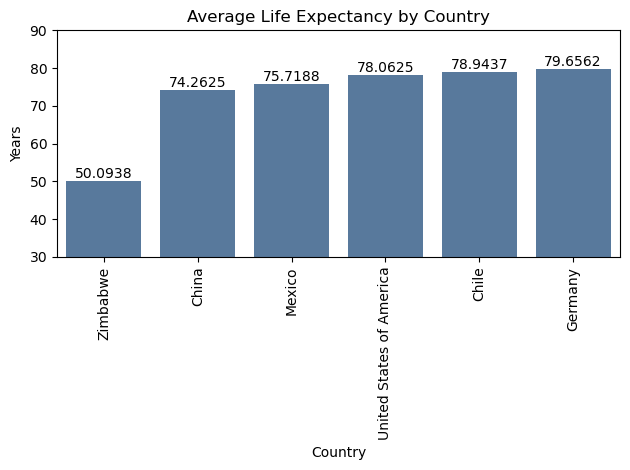

<Figure size 640x480 with 0 Axes>

In [99]:
# Visualization of average by country
ax = plt.subplot()
sns.barplot(x=country_means.index, y=country_means.values, color='#4C78A8')
plt.title('Average Life Expectancy by Country')
plt.ylabel('Years')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.axis([None, None, 30, 90])
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()
plt.clf()

___
## Conclusions

By exploring the dataset, we were able to answer these questions:
- *Has life expectancy increased over time in the six nations?*
    - Yes, with Zimbabwe having the greatest increase.
- *Has GDP increased over time in the six nations?*
    - GDP has also increased for all countries in our list, especially for China.
- *Is there a correlation between GDP and life expectancy of a country?*
    - Yes there is a positive correlation between GDP and life expectancy for countries in our list.
- *What is the average life expectancy in these nations?*
    - Average life expectancy was between mid to high 70s for the countries except for Zimbabwe which was 50.